In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau


sns.set_theme(style='white', context='notebook', palette='deep')

In [52]:
train_X = pd.read_csv("kaggle_datasets/train.csv")
test_data = pd.read_csv("kaggle_datasets/test.csv")
train_Y = train_X.pop('label')

In [53]:
from keras.utils import to_categorical
#train_X.describe()
train_X = train_X / 255.0
test_data = test_data / 255.0
train_X = train_X.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)
train_Y = to_categorical(train_Y, num_classes = 10)

In [54]:
from sklearn.model_selection import train_test_split
#display(train_X.shape, test_data.shape)
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size = 0.1, random_state=2)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

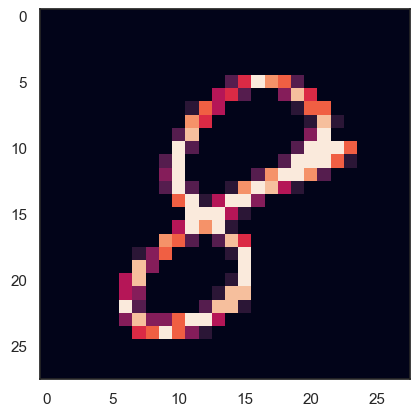

In [55]:
g = plt.imshow(train_X[0][:,:,0])
display(train_X[0][:,:,0])

In [56]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)),
    Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'),
    Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation = "relu"),
    Dropout(0.5),
    Dense(10, activation = "softmax")
])
# model = Sequential([
#     Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     MaxPool2D(pool_size=(2, 2)),
#     Dropout(0.25),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(10, activation='softmax')
# ])

In [57]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [59]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_X)


NameError: name 'X_train' is not defined

In [ ]:
history = model.fit_generator(datagen.flow(train_X,train_Y, batch_size=86),
                              epochs = 50, validation_data = (val_X,val_Y),
                              verbose = 2, steps_per_epoch=train_X.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

In [ ]:
results = model.predict(test_data)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 6s 7ms/step


In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "digit_classification.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
with open('digit_classification.pkl', 'rb') as file:
    model = pickle.load(file)




In [ ]:
data = pd.read_csv("data.csv")
data = data.drop('Unnamed: 0', axis=1)
np_data = data.values
np_data = np_data.transpose()
display(np_data.shape)
reshaped_data = np_data.reshape(-1,28, 28,1)
model.predict(reshaped_data)

(1, 784)

1/1 [==============================] - 0s 25ms/step


array([[0.01857644, 0.16586967, 0.2705715 , 0.01057088, 0.14498566,
        0.01397792, 0.0066797 , 0.2626841 , 0.09879902, 0.00728517]],
      dtype=float32)

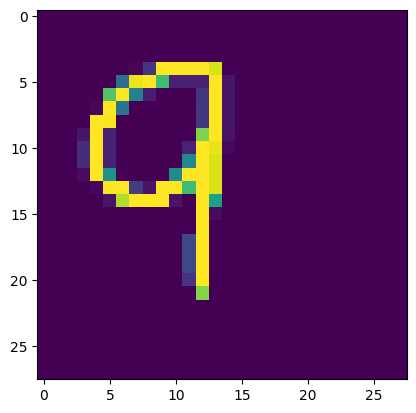

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
import matplotlib.pyplot as plt

# Assuming reshaped_data is correctly reshaped to (-1, 28, 28, 1)
# Visualize the first image
plt.imshow(reshaped_data[0, :, :, 0])
plt.show()
display(reshaped_data[0, :, :, 0])

In [ ]:
model

InvalidArgumentError: Graph execution error:

Detected at node sequential/conv2d/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1077, in launch_instance

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 529, in dispatch_queue

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 518, in process_one

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 424, in dispatch_shell

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 766, in execute_request

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes

  File "C:\Users\ianmm\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code

  File "C:\Users\ianmm\AppData\Local\Temp\ipykernel_4748\3896986080.py", line 7, in <module>

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2631, in predict

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2401, in step_function

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2389, in run_step

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 321, in call

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\activations.py", line 306, in relu

  File "c:\Users\ianmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5397, in relu

convolution input must be 4-dimensional: [28,28]
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_1994]